<a href="https://colab.research.google.com/github/sourabhsingh282/-Denoising-with-autoencoder/blob/master/stock_market_price_predicrtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the data

have a look on it 

it is a time series data of s&p 500 

splitting the dataset into train and test

taking a small part of the training data into validation 

doing some preprocessing 

training with rnn
testing and validating 
finding mse mae 


training with gru

testing and validating 

finding mse mae 

training with lstm

testing and validating 

finding mse mae 

training with hybride of lastm and  gru with drop out

testing and validating 

finding mse mae 

concluding the best model by look the the mse and mae value

taking further that model for deployement



###importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## data loading

In [2]:
df= pd.read_csv('/content/^GSPC (1).csv')

In [3]:
df.describe

<bound method NDFrame.describe of             Date         Open  ...    Adj Close      Volume
0     2000-01-03  1469.250000  ...  1455.219971   931800000
1     2000-01-04  1455.219971  ...  1399.420044  1009000000
2     2000-01-05  1399.420044  ...  1402.109985  1085500000
3     2000-01-06  1402.109985  ...  1403.449951  1092300000
4     2000-01-07  1403.449951  ...  1441.469971  1225200000
...          ...          ...  ...          ...         ...
5212  2020-09-21  3285.570068  ...  3281.060059  4828350000
5213  2020-09-22  3295.750000  ...  3315.570068  3963300000
5214  2020-09-23  3320.110107  ...  3236.919922  4364500000
5215  2020-09-24  3226.139893  ...  3246.590088  4599470000
5216  2020-09-25  3236.659912  ...  3298.459961  3792220000

[5217 rows x 7 columns]>

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5212,2020-09-21,3285.570068,3285.570068,3229.100098,3281.060059,3281.060059,4828350000
5213,2020-09-22,3295.750000,3320.310059,3270.949951,3315.570068,3315.570068,3963300000
5214,2020-09-23,3320.110107,3323.350098,3232.570068,3236.919922,3236.919922,4364500000
5215,2020-09-24,3226.139893,3278.699951,3209.449951,3246.590088,3246.590088,4599470000
5216,2020-09-25,3236.659912,3306.879883,3228.439941,3298.459961,3298.459961,3792220000


## data visualization

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [8]:
df = df.set_index("Date")


In [9]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


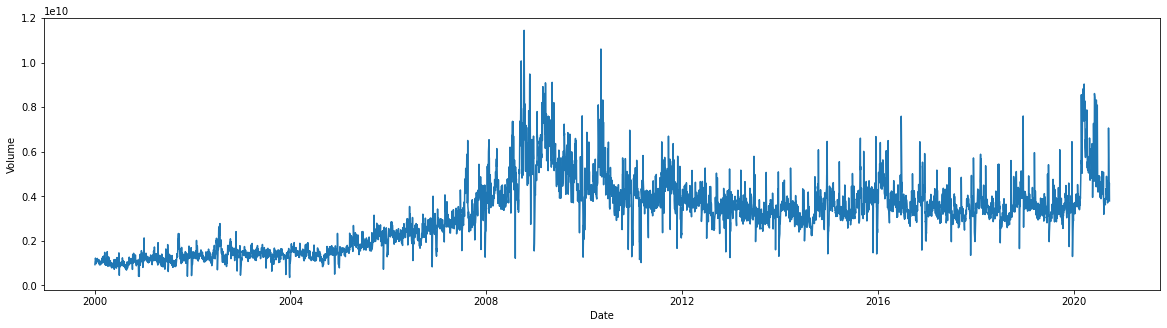

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
sns.lineplot(data =df, x=df.index , y = 'Volume',)


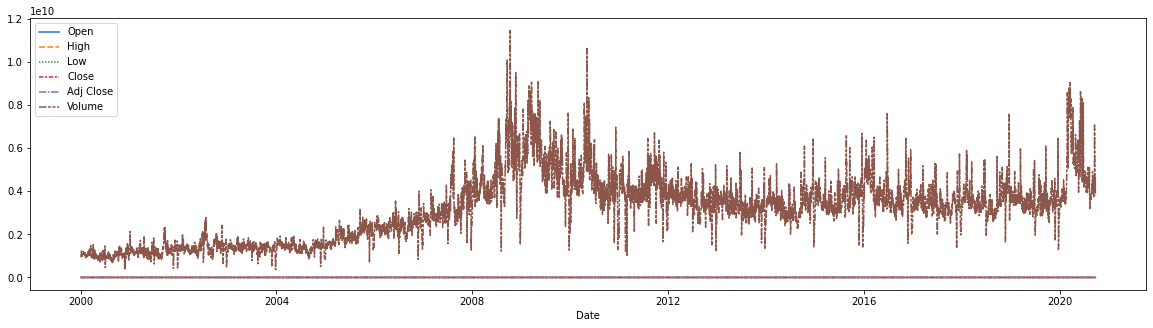

In [11]:
plt.figure(figsize=(20,5))
sns.lineplot(data =df,)

#data splitting

#now we will start the preprocessing of the data

In [12]:
from sklearn.preprocessing import MinMaxScaler
#class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True)

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
df=scaler.fit_transform(df)

In [15]:
df.shape

(5217, 6)

In [16]:
train=df[0:3000]
test =df[3001:]
validate=df[2500:2999]

In [17]:
test.shape

(2216, 6)

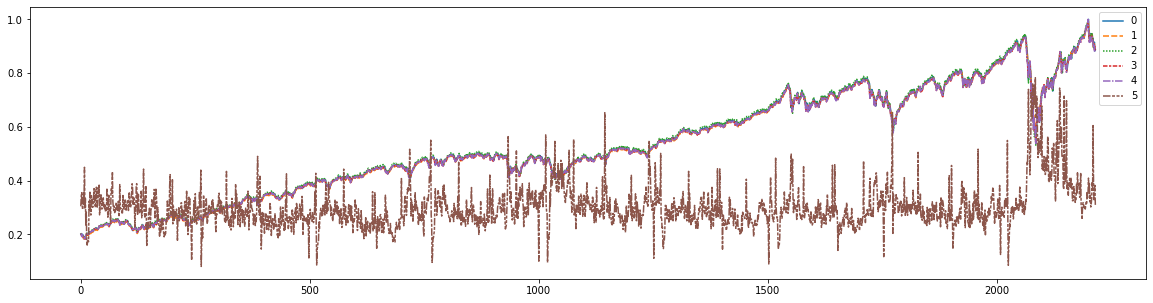

In [18]:
plt.figure(figsize=(20,5))
sns.lineplot(data =test,)

In [19]:
scaled_train_samples=scaler.fit_transform(train)
scaled_test_samples=scaler.fit_transform(test)
scaled_validate_samples=scaler.fit_transform(validate)

In [20]:
scaled_train_samples

array([[0.89191602, 0.88863789, 0.86823008, 0.87629127, 0.87629127,
        0.05186682],
       [0.8760754 , 0.86277559, 0.82217256, 0.81349735, 0.81349735,
        0.05882167],
       [0.81307447, 0.81514957, 0.79994834, 0.81652445, 0.81652445,
        0.06571347],
       ...,
       [0.58421584, 0.62650712, 0.5963181 , 0.64192786, 0.64192786,
        0.49060914],
       [0.64088296, 0.63102561, 0.64471628, 0.63924954, 0.63924954,
        0.31194235],
       [0.63988939, 0.641232  , 0.64878977, 0.63891202, 0.63891202,
        0.34127796]])

In [21]:
scaled_test_samples

array([[0.02181837, 0.01754152, 0.02171585, 0.0223617 , 0.0223617 ,
        0.31879888],
       [0.02222111, 0.01797732, 0.018188  , 0.02343097, 0.02343097,
        0.37348395],
       [0.02337836, 0.01535834, 0.01247395, 0.01220801, 0.01220801,
        0.39116414],
       ...,
       [0.89630021, 0.88798159, 0.87026229, 0.85522139, 0.85522139,
        0.39964699],
       [0.85646578, 0.86909038, 0.86035166, 0.85929219, 0.85929219,
        0.42978785],
       [0.86092527, 0.88101314, 0.86849188, 0.88112764, 0.88112764,
        0.32623757]])

In [22]:
scaled_validate_samples

array([[0.21045127, 0.2171017 , 0.25240087, 0.23390894, 0.23390894,
        0.30976221],
       [0.22606337, 0.2237658 , 0.26002071, 0.24581422, 0.24581422,
        0.28835034],
       [0.23755764, 0.24230684, 0.27871068, 0.26839274, 0.26839274,
        0.3673053 ],
       ...,
       [0.48853557, 0.50564254, 0.52012793, 0.50614298, 0.50614298,
        0.30936191],
       [0.50085904, 0.63430392, 0.53427458, 0.65794788, 0.65794788,
        0.49796775],
       [0.64954394, 0.64609191, 0.65794476, 0.65096901, 0.65096901,
        0.29122645]])

In [23]:
print(scaled_validate_samples.shape)
print(scaled_test_samples.shape)
print(scaled_train_samples.shape)

(499, 6)
(2216, 6)
(3000, 6)


In [24]:
import numpy as np
def create_dataset(dataset,time_stamp =1):
  X, Y = [], []
  for i in range(len(dataset)-time_stamp-1):
    a= dataset[i:(i+time_stamp),0]
    X.append(a)
    Y.append(df[i+time_stamp,0])
  return np.array(X),np.array(Y)


In [25]:
time_stamp=100
x_train , y_train=create_dataset(train,time_stamp)
x_test, y_test = create_dataset(test, time_stamp)

# start building the model

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
print(x_test)
print(x_train)
print(x_train.shape)

[[0.20028346 0.20061273 0.20155884 ... 0.24653261 0.24984229 0.25090626]
 [0.20061273 0.20155884 0.19241298 ... 0.24984229 0.25090626 0.2490348 ]
 [0.20155884 0.19241298 0.19954185 ... 0.25090626 0.2490348  0.25168257]
 ...
 [0.78033655 0.75891195 0.74016968 ... 0.92449042 0.9281362  0.90324942]
 [0.75891195 0.74016968 0.7588391  ... 0.9281362  0.90324942 0.90677743]
 [0.74016968 0.7588391  0.76378113 ... 0.90324942 0.90677743 0.9152198 ]]
[[0.2737761  0.26891378 0.24957547 ... 0.25218507 0.25002598 0.24071724]
 [0.26891378 0.24957547 0.25050771 ... 0.25002598 0.24071724 0.24944724]
 [0.24957547 0.25050771 0.25097209 ... 0.24071724 0.24944724 0.24337194]
 ...
 [0.23327649 0.2301297  0.22191608 ... 0.17612442 0.16708948 0.1661399 ]
 [0.2301297  0.22191608 0.22012779 ... 0.16708948 0.1661399  0.17788499]
 [0.22191608 0.22012779 0.221268   ... 0.1661399  0.17788499 0.17932668]]
(2899, 100)


In [28]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [29]:
x_train.shape

(2899, 100, 1)

In [30]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 151,451
Trainable params: 151,451
Non-trainable params: 0
_________________________________________________________________


In [32]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 26s 160ms/step - loss: 0.0022 - val_loss: 3.4985e-04
Epoch 2/50
164/164 [==============================] - 27s 166ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 3/50
164/164 [==============================] - 27s 163ms/step - loss: 0.0018 - val_loss: 7.4621e-04
Epoch 4/50
164/164 [==============================] - 27s 162ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 5/50
164/164 [==============================] - 27s 163ms/step - loss: 0.0020 - val_loss: 0.0042
Epoch 6/50
164/164 [==============================] - 27s 163ms/step - loss: 0.0024 - val_loss: 0.0068
Epoch 7/50
164/164 [==============================] - 27s 163ms/step - loss: 0.0030 - val_loss: 0.0061
Epoch 8/50
164/164 [==============================] - 27s 162ms/step - loss: 0.0030 - val_loss: 0.0060
Epoch 9/50
164/164 [==============================] - 27s 163ms/step - loss: 0.0030 - val_loss: 0.0053
Epoch 10/50
164/164 [==============================] - 27s 163ms/

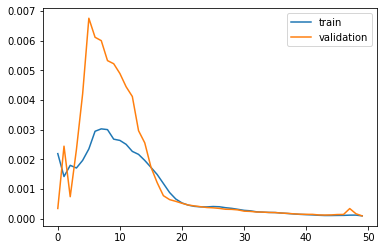

In [33]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [37]:
model=Sequential()
model.add(tf.keras.layers.GRU(100,return_sequences=True,input_shape=(100,1)))
model.add(tf.keras.layers.GRU(50,return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 18s 108ms/step - loss: 0.0033 - val_loss: 7.1572e-04
Epoch 2/50
164/164 [==============================] - 17s 106ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 3/50
164/164 [==============================] - 16s 97ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 4/50
164/164 [==============================] - 16s 99ms/step - loss: 0.0025 - val_loss: 0.0067
Epoch 5/50
164/164 [==============================] - 17s 104ms/step - loss: 0.0029 - val_loss: 0.0073
Epoch 6/50
164/164 [==============================] - 16s 99ms/step - loss: 0.0031 - val_loss: 0.0072
Epoch 7/50
164/164 [==============================] - 16s 97ms/step - loss: 0.0034 - val_loss: 0.0068
Epoch 8/50
164/164 [==============================] - 16s 97ms/step - loss: 0.0033 - val_loss: 0.0061
Epoch 9/50
164/164 [==============================] - 16s 97ms/step - loss: 0.0032 - val_loss: 0.0057
Epoch 10/50
164/164 [==============================] - 16s 96ms/step - loss

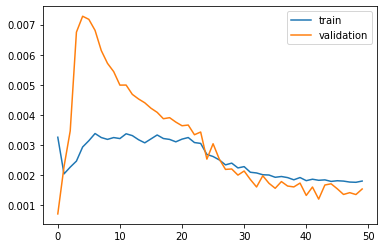

In [39]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [52]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(layer = tf.keras.layers.Dropout(.2,))
model.add(tf.keras.layers.GRU(50,return_sequences=True))
model.add(tf.keras.layers.Dropout(.2,))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))


In [53]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=20,batch_size=16,verbose=1,)

Epoch 1/20
164/164 [==============================] - 16s 99ms/step - loss: 0.0028 - val_loss: 6.5694e-04
Epoch 2/20
164/164 [==============================] - 17s 101ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 3/20
164/164 [==============================] - 17s 104ms/step - loss: 0.0026 - val_loss: 0.0064
Epoch 4/20
164/164 [==============================] - 17s 101ms/step - loss: 0.0032 - val_loss: 0.0076
Epoch 5/20
164/164 [==============================] - 17s 101ms/step - loss: 0.0034 - val_loss: 0.0073
Epoch 6/20
164/164 [==============================] - 16s 100ms/step - loss: 0.0033 - val_loss: 0.0064
Epoch 7/20
164/164 [==============================] - 16s 100ms/step - loss: 0.0032 - val_loss: 0.0061
Epoch 8/20
164/164 [==============================] - 16s 100ms/step - loss: 0.0035 - val_loss: 0.0058
Epoch 9/20
164/164 [==============================] - 16s 100ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 10/20
164/164 [==============================] - 16s 99ms/step -